Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel $\rightarrow$ Restart) and then **run all cells** (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Nianyang Chen"
COLLABORATORS = "N/A"

---

**Project Part 1: 
Download the dataset via kaggle hub**

In [2]:
!pip install kagglehub

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import kagglehub

# Download the airline delay dataset
path = kagglehub.dataset_download("sriharshaeedala/airline-delay")

print("Path to dataset files:", path)

Path to dataset files: /home/nc814/.cache/kagglehub/datasets/sriharshaeedala/airline-delay/versions/1


Load the dataset:

In [4]:
import pandas as pd
import os

# Locate file in the downloaded directory
print("Files downloaded:")
print(os.listdir(path))

Files downloaded:
['Airline_Delay_Cause.csv']


In [5]:
# Load the CSV 
df = pd.read_csv(f"{path}/Airline_Delay_Cause.csv") 

In [6]:
# Quick check of the dataset
print(f"Dataset shape: {df.shape}")
print()
print(f"Rows: {df.shape[0]:,}, Columns: {df.shape[1]}")

# See column names and types
print()
print("Column Information:")
print(df.info())


Dataset shape: (171666, 21)

Rows: 171,666, Columns: 21

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171666 entries, 0 to 171665
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 171666 non-null  int64  
 1   month                171666 non-null  int64  
 2   carrier              171666 non-null  object 
 3   carrier_name         171666 non-null  object 
 4   airport              171666 non-null  object 
 5   airport_name         171666 non-null  object 
 6   arr_flights          171426 non-null  float64
 7   arr_del15            171223 non-null  float64
 8   carrier_ct           171426 non-null  float64
 9   weather_ct           171426 non-null  float64
 10  nas_ct               171426 non-null  float64
 11  security_ct          171426 non-null  float64
 12  late_aircraft_ct     171426 non-null  float64
 13  arr_cancelled        171426 non-null  floa

**Part 2: Dataset Visualizations:**

In [7]:
import matplotlib.pyplot as plt
import numpy as np

Visualization of Overall Delay Distribution:

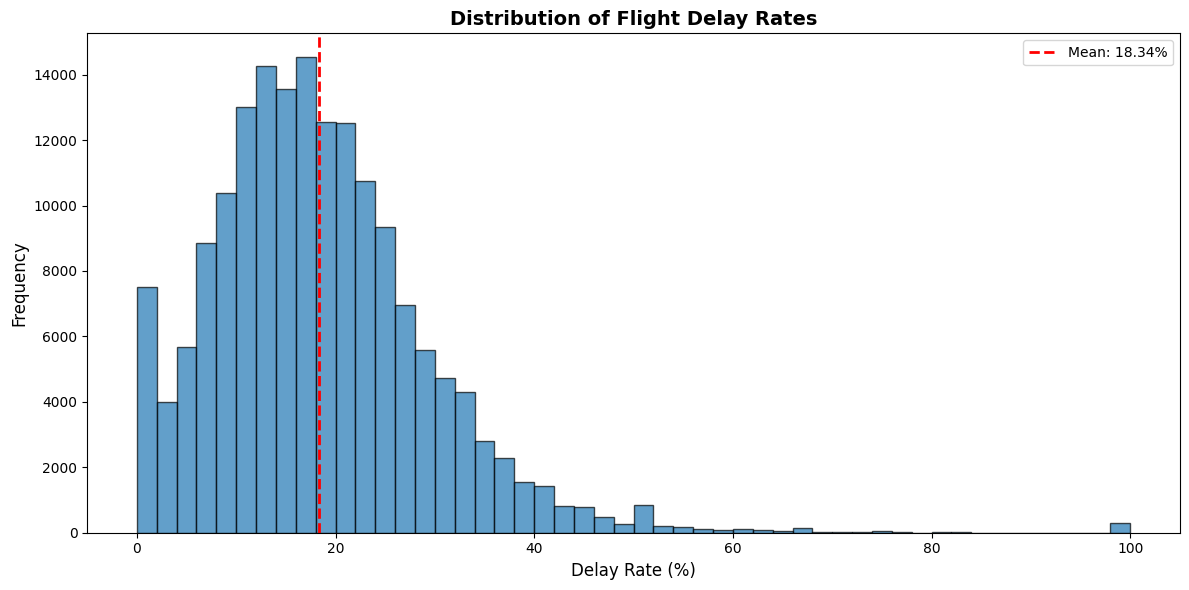

Average delay rate: 18.34%
Median delay rate: 17.07%


In [8]:
# Create delay rate column
df['delay_rate'] = (df['arr_del15'] / df['arr_flights']) * 100

plt.figure(figsize=(12, 6))
plt.hist(df['delay_rate'].dropna(), bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Delay Rate (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Flight Delay Rates', fontsize=14, fontweight='bold')
plt.axvline(df['delay_rate'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["delay_rate"].mean():.2f}%')
plt.legend()
plt.tight_layout()
plt.show()

print(f"Average delay rate: {df['delay_rate'].mean():.2f}%")
print(f"Median delay rate: {df['delay_rate'].median():.2f}%")

Visualization of Delay Rate by Airlines:

In [ ]:
# Calculate delay rate for each airlines
carrier_delays = df.groupby('carrier_name').agg({'arr_flights': 'sum','arr_del15': 'sum'}).reset_index()

carrier_delays['delay_rate'] = (carrier_delays['arr_del15'] / carrier_delays['arr_flights']) * 100
carrier_delays = carrier_delays.sort_values('delay_rate', ascending=False).head(15)

plt.figure(figsize=(14, 6))
plt.barh(carrier_delays['carrier_name'], carrier_delays['delay_rate'], color='coral')
plt.xlabel('Delay Rate (%)', fontsize=12)
plt.ylabel('Airline', fontsize=12)
plt.title('Top 15 Airlines by Delay Rate (% of flights delayed 15+ minutes)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print(f"Average delay rate across all carriers: {(df['arr_del15'].sum() / df['arr_flights'].sum()) * 100:.2f}%")

Visualization of Delay Causes:

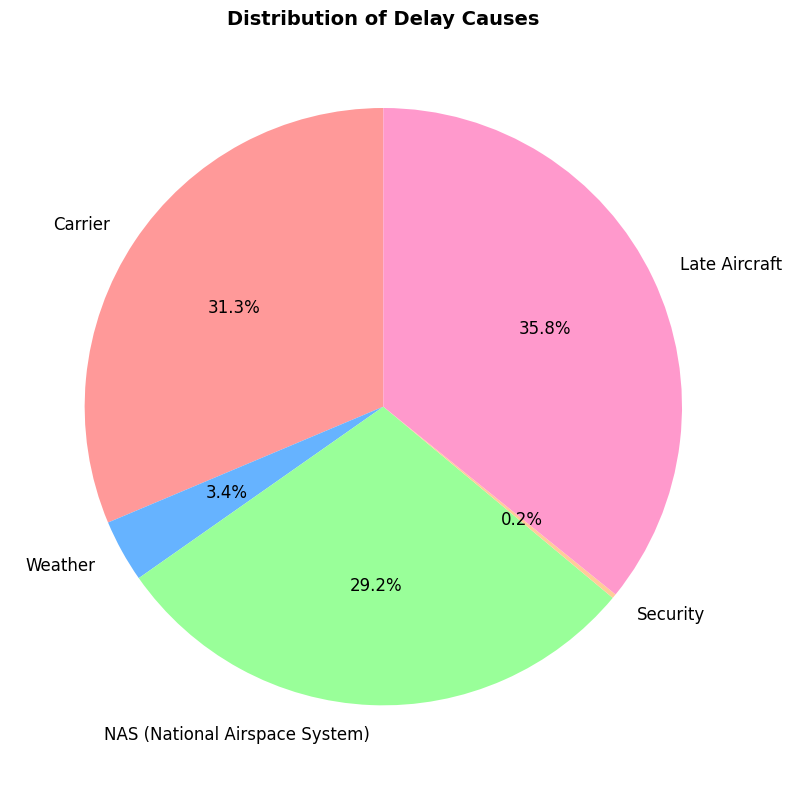


Delay Causes (Total Delayed Flights):
Carrier: 3,565,080.59
Weather: 385,767.94
NAS (National Airspace System): 3,322,432.5199999996
Security: 26,930.39
Late Aircraft: 4,074,891.0000000005


In [10]:
# Sum up all delay causes
delay_causes = {'Carrier': df['carrier_ct'].sum(), 'Weather': df['weather_ct'].sum(), 'NAS (National Airspace System)': df['nas_ct'].sum(), 'Security': df['security_ct'].sum(), 'Late Aircraft': df['late_aircraft_ct'].sum()}

plt.figure(figsize=(10, 8))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc']
plt.pie(delay_causes.values(), labels=delay_causes.keys(), autopct='%1.1f%%', colors=colors, startangle=90, textprops={'fontsize': 12})
plt.title('Distribution of Delay Causes', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nDelay Causes (Total Delayed Flights):")
for cause, count in delay_causes.items():
    print(f"{cause}: {count:,}")

Visualization of Monthly Delay:

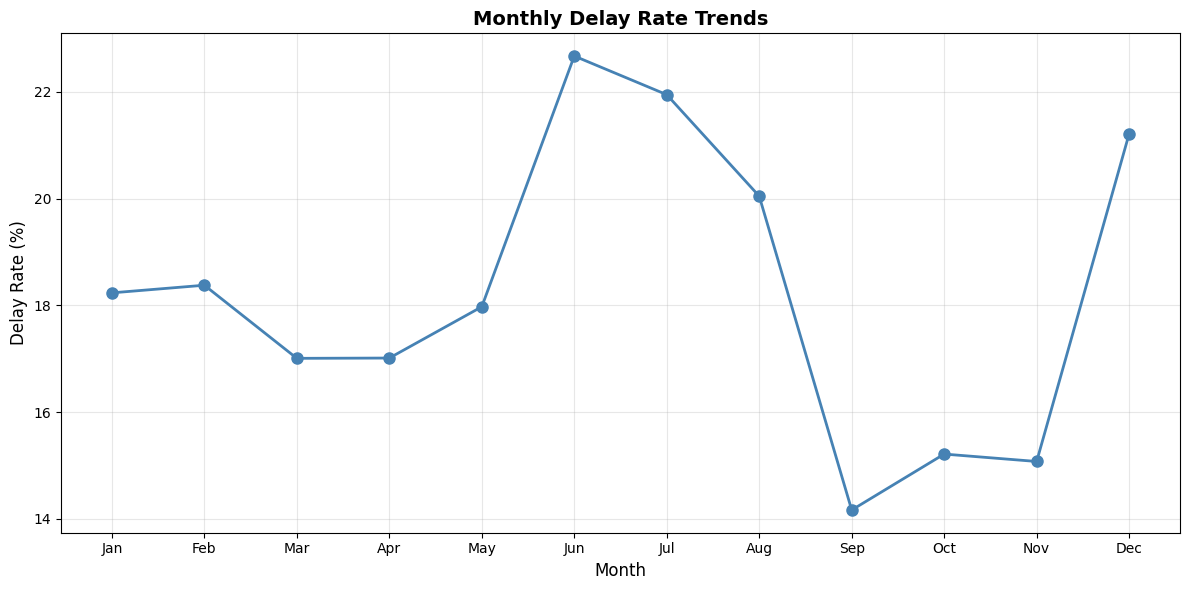

In [11]:
# Delays by month
monthly_delays = df.groupby('month').agg({'arr_flights': 'sum', 'arr_del15': 'sum'}).reset_index()

monthly_delays['delay_rate'] = (monthly_delays['arr_del15'] / monthly_delays['arr_flights']) * 100

plt.figure(figsize=(12, 6))
plt.plot(monthly_delays['month'], monthly_delays['delay_rate'], marker='o', linewidth=2, markersize=8, color='steelblue')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Delay Rate (%)', fontsize=12)
plt.title('Monthly Delay Rate Trends', fontsize=14, fontweight='bold')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Visualizate Top Airports by Delays

In [ ]:
# Top airports by delay rate
airport_delays = df.groupby('airport_name').agg({
    'arr_flights': 'sum',
    'arr_del15': 'sum'
}).reset_index()

airport_delays['delay_rate'] = (airport_delays['arr_del15'] / airport_delays['arr_flights']) * 100
airport_delays = airport_delays[airport_delays['arr_flights'] > 1000]  # Filter for airports with significant traffic
airport_delays = airport_delays.sort_values('delay_rate', ascending=False).head(20)

plt.figure(figsize=(14, 6))
plt.barh(airport_delays['airport_name'], airport_delays['delay_rate'])
plt.xlabel('Delay Rate (%)', fontsize=12)
plt.ylabel('Airport', fontsize=12)
plt.title('Top 20 Airports by Delay Rate', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

**Part 3: Data Cleaning:**

In [13]:
# Check data types
print("\nData types:")
print(df.dtypes)


Data types:
year                     int64
month                    int64
carrier                 object
carrier_name            object
airport                 object
airport_name            object
arr_flights            float64
arr_del15              float64
carrier_ct             float64
weather_ct             float64
nas_ct                 float64
security_ct            float64
late_aircraft_ct       float64
arr_cancelled          float64
arr_diverted           float64
arr_delay              float64
carrier_delay          float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_delay    float64
delay_rate             float64
dtype: object


Check Missing Values:

In [14]:
print("Missing Values Analysis:")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({'Missing_Count': missing, 'Percentage': missing_pct}).sort_values('Percentage', ascending=False)

print(missing_df[missing_df['Missing_Count'] > 0])

if missing_df['Missing_Count'].sum() == 0:
    print("No missing values found!")

Missing Values Analysis:
                     Missing_Count  Percentage
delay_rate                     443    0.258059
arr_del15                      443    0.258059
late_aircraft_ct               240    0.139806
late_aircraft_delay            240    0.139806
security_delay                 240    0.139806
nas_delay                      240    0.139806
weather_delay                  240    0.139806
carrier_delay                  240    0.139806
arr_delay                      240    0.139806
arr_diverted                   240    0.139806
arr_cancelled                  240    0.139806
security_ct                    240    0.139806
nas_ct                         240    0.139806
weather_ct                     240    0.139806
carrier_ct                     240    0.139806
arr_flights                    240    0.139806


Check Potential Negative Values:

In [15]:
print("Checking if negative values exist in count/delay columns:")
count_cols = ['arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted']

for col in count_cols:
    negative_count = (df[col] < 0).sum()

if negative_count > 0:
    print(f"{col}: {negative_count} negative values")
else:
    print("No negative values found")

Checking if negative values exist in count/delay columns:
No negative values found


Check For Duplicate Rows:

In [16]:
print("Check for duplicates:")
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

if duplicates > 0:
    print(f"Found {duplicates} duplicate rows")
else:
    print("No duplicates found")

Check for duplicates:
Duplicate rows: 0
No duplicates found


Handle missing values if exist:

In [17]:
df_clean = df.copy() 

if df_clean.isnull().sum().sum() > 0:
    # For numeric columns: fill with 0 (reasonable for delay/count columns)
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df[numeric_cols] = df[numeric_cols].fillna(0)
    
    # For categorical columns: fill with 'Unknown'
    categorical_cols = df.select_dtypes(include=['object']).columns
    df[categorical_cols] = df[categorical_cols].fillna('Unknown')
    
    print(f"Filled missing values")
else:
    print("No missing values to handle")

Filled missing values


Verify that the data is clean:

In [18]:
print(f"Missing values: {df_clean.isnull().sum().sum()}")

count_cols = ['arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted', 'arr_delay', 
              'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']

for col in count_cols:
    neg_count = (df_clean[col] < 0).sum()

if negative_count > 0:
    print(f"{col}: {negative_count} negative values")
else:
    print(f"Negative rows: {neg_count}")

print(f"Duplicate rows: {df_clean.duplicated().sum()}")

Missing values: 4246
Negative rows: 0
Duplicate rows: 0


**Part 4: Feature Engineering**

In [19]:
# Create Some features from the cleaned dataset, starting with rate-based features
# 1. Calculate delay rate (percentage of flights delayed)
df_clean['delay_rate'] = (df_clean['arr_del15'] / df_clean['arr_flights']) * 100
# 2. Calculate cancellation rate
df_clean['cancellation_rate'] = (df_clean['arr_cancelled'] / df_clean['arr_flights']) * 100
# 3. Calculate diversion rate
df_clean['diversion_rate'] = (df_clean['arr_diverted'] / df_clean['arr_flights']) * 100

In [20]:
# Season feature (Time-based)
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df_clean['season'] = df_clean['month'].apply(get_season)

# Peak season indicator (peak travel months)
df_clean['peak_season'] = df_clean['month'].isin([6, 7, 8, 11, 12]).astype(int)

In [21]:
# Weather impact proportion (what % of total delay is weather-related)
df_clean['weather_impact_pct'] = (df_clean['weather_delay'] / (df_clean['arr_delay'] + 1)) * 100

# Carrier impact proportion
df_clean['carrier_impact_pct'] = (df_clean['carrier_delay'] / (df_clean['arr_delay'] + 1)) * 100

# NAS impact proportion
df_clean['nas_impact_pct'] = (df_clean['nas_delay'] / (df_clean['arr_delay'] + 1)) * 100

# Late aircraft impact proportion
df_clean['late_aircraft_impact_pct'] = (df_clean['late_aircraft_delay'] / (df_clean['arr_delay'] + 1)) * 100

# Average delay per delayed flight
df_clean['avg_delay_per_delayed_flight'] = df_clean['arr_delay'] / (df_clean['arr_del15'] + 1)

In [22]:
print(f"Feature engineering complete!")
print(f"Dataset now has {df_clean.shape[1]} columns (was {df.shape[1]})")

Feature engineering complete!
Dataset now has 31 columns (was 22)


In [23]:
# Handle any inf/nan values created during feature engineering
# Replace inf with 0
df_clean = df_clean.replace([np.inf, -np.inf], 0)

# Fill any remaining NaN with 0
df_clean = df_clean.fillna(0)

In [24]:
print(f"Product of feature engineering: ")
feature_cols = ['delay_rate', 'cancellation_rate', 'diversion_rate', 'season', 
                'peak_season', 'weather_impact_pct', 'carrier_impact_pct',
                'avg_delay_per_delayed_flight']

df_clean[feature_cols].head(10)

Product of feature engineering: 


,delay_rate,cancellation_rate,diversion_rate,season,peak_season,weather_impact_pct,carrier_impact_pct,avg_delay_per_delayed_flight
0,14.606742,2.247191,1.123596,Summer,1,55.305233,5.159884,98.214286
1,16.129032,0.000000,1.612903,Summer,1,0.125000,27.250000,72.636364
2,16.129032,1.612903,0.000000,Summer,1,24.511082,7.301173,69.636364
3,18.181818,1.515152,1.515152,Summer,1,22.889843,33.690987,107.461538
4,23.913043,2.173913,0.000000,Summer,1,0.000000,41.018942,66.521739
5,15.647922,1.955990,0.672372,Summer,1,15.307871,31.371561,115.828794
6,16.000000,0.000000,0.000000,Summer,1,20.142180,63.388626,64.846154
7,11.864407,3.389831,0.000000,Summer,1,0.000000,36.000000,40.500000
8,20.967742,0.000000,0.000000,Summer,1,10.875706,66.384181,50.500000
9,13.333333,3.333333,0.000000,Summer,1,37.412096,0.000000,284.200000


**Part 5: Create Target Variable & Prepare for Modeling**

Target variable created: is_delayed
Threshold: 20% delay rate

Target distribution:
is_delayed
0    106623
1     65043
Name: count, dtype: int64

Percentages:
is_delayed
0    62.110727
1    37.889273
Name: proportion, dtype: float64


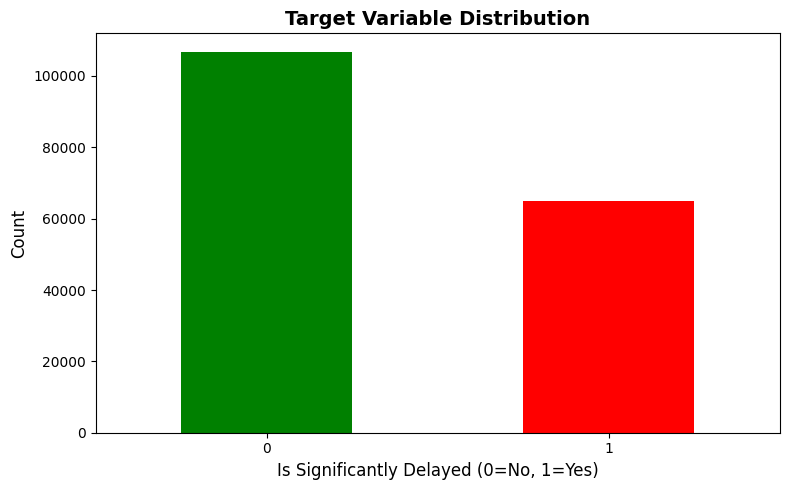

In [25]:
# Create binary target variable for prediction
# Target: Will there be significant delays?
# I'll classify "significants delay" if delay_rate > 20%
threshold = 20  # 20% of flights delayed

df_clean['is_delayed'] = (df_clean['delay_rate'] > threshold).astype(int)

print(f"Target variable created: is_delayed")
print(f"Threshold: {threshold}% delay rate")
print("\nTarget distribution:")
print(df_clean['is_delayed'].value_counts())
print("\nPercentages:")
print(df_clean['is_delayed'].value_counts(normalize=True) * 100)

# Visualize target distribution
plt.figure(figsize=(8, 5))
df_clean['is_delayed'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.xlabel('Is Significantly Delayed (0=No, 1=Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Target Variable Distribution', fontsize=14, fontweight='bold')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [26]:
# Select features for modeling
# Features I'll use for prediction:
feature_columns = [
    # Time features
    'year', 
    'month', 
    'peak_season',
    
    # Flight volume (flights scheduled)
    'arr_flights',
    
    # Operational metrics
    'arr_cancelled',  # Cancellations that month
    'arr_diverted',   # Diversions that month
    
    # Rates
    'cancellation_rate',
    'diversion_rate'
]

# Categorical encodings
from sklearn.preprocessing import LabelEncoder

# Create a copy for modeling
df_model = df_clean.copy()

# Encode categorical variables
le_carrier = LabelEncoder()
le_airport = LabelEncoder()
le_season = LabelEncoder()

df_model['carrier_encoded'] = le_carrier.fit_transform(df_model['carrier'])
df_model['airport_encoded'] = le_airport.fit_transform(df_model['airport'])
df_model['season_encoded'] = le_season.fit_transform(df_model['season'])

print("Categorical variables encoded")
categorical_features = ['carrier_encoded', 'airport_encoded', 'season_encoded']

# Combine all features
all_features = feature_columns + categorical_features

print(f"Total features: {len(all_features)}")
print("Features being used:")
for i, feat in enumerate(all_features, 1):
    print(f"  {i}. {feat}")

# Create X and y
X = df_model[all_features]
y = df_model['is_delayed']

print(f"\nX shape: {X.shape}")
print(f"y shape: {y.shape}")

Categorical variables encoded
Total features: 11
Features being used:
  1. year
  2. month
  3. peak_season
  4. arr_flights
  5. arr_cancelled
  6. arr_diverted
  7. cancellation_rate
  8. diversion_rate
  9. carrier_encoded
  10. airport_encoded
  11. season_encoded

X shape: (171666, 11)
y shape: (171666,)


**Part 6: Train Baseline Model (Logistic Regression)**

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

print(f"Training set: {X_train.shape[0]:,} samples")
print(f"Test set: {X_test.shape[0]:,} samples")
print("\nTraining Logistic Regression model...")

# Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"\n MODEL PERFORMANCE:")
print(f"Training Accuracy: {train_accuracy*100:.2f}%")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

# Check if it meet the goal (≥75%)
if test_accuracy >= 0.75:
    print(f"\n SUCCESS! Test accuracy ({test_accuracy*100:.2f}%) meets the ≥75% goal!")
else:
    print(f"\n Test accuracy ({test_accuracy*100:.2f}%) is below 75% goal")

Training set: 137,332 samples
Test set: 34,334 samples

Training Logistic Regression model...

 MODEL PERFORMANCE:
Training Accuracy: 63.69%
Test Accuracy: 63.90%

 Test accuracy (63.90%) is below 75% goal


/usr/local/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Part 6.1 Improve Logistic Regression**

In [28]:
# Add Historical Aggregate Features
# Historical average delay rate by carrier
df_model['carrier_avg_delay'] = df_model.groupby('carrier')['delay_rate'].transform('mean')

# Historical average delay rate by airport
df_model['airport_avg_delay'] = df_model.groupby('airport')['delay_rate'].transform('mean')

# Historical average delay rate by month 
df_model['month_avg_delay'] = df_model.groupby('month')['delay_rate'].transform('mean')

# Carrier-airport combination historical average delay
df_model['carrier_airport_avg_delay'] = df_model.groupby(['carrier', 'airport'])['delay_rate'].transform('mean')

# Interaction features
df_model['peak_x_flights'] = df_model['peak_season'] * df_model['arr_flights']
df_model['carrier_x_month'] = df_model['carrier_encoded'] * df_model['month']


In [29]:
# Updated feature list with historical aggregates
feature_columns = [
    # Time features
    'year', 'month', 'peak_season',
    
    # Flight volume
    'arr_flights',
    
    # Operational metrics
    'arr_cancelled', 'arr_diverted',
    'cancellation_rate', 'diversion_rate',
    
    # Historical aggregates
    'carrier_avg_delay',
    'airport_avg_delay', 
    'month_avg_delay',
    'carrier_airport_avg_delay',
    
    # Interactions
    'peak_x_flights',
    'carrier_x_month'
]

# Categorical
categorical_features = ['carrier_encoded', 'airport_encoded', 'season_encoded']

all_features = feature_columns + categorical_features

# Recreate X and y
X = df_model[all_features]
y = df_model['is_delayed']

print(f"Updated features: {len(all_features)}")

Updated features: 17


In [30]:
# Re-run Train/Test Split and Logistic Regression
# Re-split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Retrain Logistic Regression
print("\nRetraining Logistic Regression with improved features...")
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"\nImproved Logistic Regression:")
print(f"Training Accuracy: {train_accuracy*100:.2f}%")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")


Retraining Logistic Regression with improved features...

Improved Logistic Regression:
Training Accuracy: 70.33%
Test Accuracy: 70.57%


/usr/local/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Part 7: Basic Random Forest**

In [31]:
print("Random Forest - Basic Configuration")

from sklearn.ensemble import RandomForestClassifier
rf_basic = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf_basic.fit(X_train, y_train)
y_pred_rf_basic = rf_basic.predict(X_test)
acc_rf_basic = accuracy_score(y_test, y_pred_rf_basic)

print(f"\nResult: {acc_rf_basic*100:.2f}% accuracy")
print(f"Analysis: {'SUCCESS - Meets goal!' if acc_rf_basic >= 0.75 else 'Below 75% goal - may needs hyperparameter tuning'}")
print(f"Learning: Random Forest performs {(acc_rf_basic - test_accuracy)*100:.2f}% better than Logistic Regression")

Random Forest - Basic Configuration

Result: 77.94% accuracy
Analysis: SUCCESS - Meets goal!
Learning: Random Forest performs 7.37% better than Logistic Regression


**Part 7.1:  Random Forest with Tuning**

In [32]:
print("Random Forest - Tuning")

print("Hypothesis: Adjusting tree depth and forest size may improve performance")

# Try different configurations
# 'n_estimators' = number of decision trees, 'max_depth' = maximum tree depth, 'min_samples_split' = minimum samples to split node
configs = [
    {'n_estimators': 200, 'max_depth': 15, 'min_samples_split': 5},
    {'n_estimators': 150, 'max_depth': 20, 'min_samples_split': 10},
    {'n_estimators': 100, 'max_depth': 25, 'min_samples_split': 15},
]

best_acc = 0
best_config = None

for i, config in enumerate(configs, 1):
    rf = RandomForestClassifier(random_state=42, n_jobs=-1, **config)
    rf.fit(X_train, y_train)
    acc = accuracy_score(y_test, rf.predict(X_test))
    print(f"\nConfig {i}: {config}")
    print(f"  Accuracy: {acc*100:.2f}%")
    
    if acc > best_acc:
        best_acc = acc
        best_config = config
        best_rf = rf

print(f" \nBest Configuration: {best_config}")
print(f" Best Accuracy: {best_acc*100:.2f}%")

Random Forest - Tuning
Hypothesis: Adjusting tree depth and forest size may improve performance

Config 1: {'n_estimators': 200, 'max_depth': 15, 'min_samples_split': 5}
  Accuracy: 78.09%

Config 2: {'n_estimators': 150, 'max_depth': 20, 'min_samples_split': 10}
  Accuracy: 78.49%

Config 3: {'n_estimators': 100, 'max_depth': 25, 'min_samples_split': 15}
  Accuracy: 78.40%
 
Best Configuration: {'n_estimators': 150, 'max_depth': 20, 'min_samples_split': 10}
 Best Accuracy: 78.49%


**Part 7.2 Random Forest with Balanced Class Weights**

In [33]:
print("Random Forest with Balanced Class Weights")
print("Hypothesis: Balancing class weights may improve minority class prediction")

# Check class distribution
print(f"\nClass distribution:")
print(y_train.value_counts(normalize=True))

rf_balanced = RandomForestClassifier(
    n_estimators=150,
    max_depth=20,
    class_weight='balanced',  # This is the key change
    random_state=42,
    n_jobs=-1
)

rf_balanced.fit(X_train, y_train)
y_pred_balanced = rf_balanced.predict(X_test)
acc_balanced = accuracy_score(y_test, y_pred_balanced)

print(f"\nResult: {acc_balanced*100:.2f}% accuracy")

Random Forest with Balanced Class Weights
Hypothesis: Balancing class weights may improve minority class prediction

Class distribution:
is_delayed
0    0.621108
1    0.378892
Name: proportion, dtype: float64

Result: 78.39% accuracy


**Part 8: Try Gradient Boosting**

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

print("Gradient Boosting - Sequential Learning")
print("Hypothesis: Sequential error correction may capture patterns Random Forest missed")

gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
acc_gb = accuracy_score(y_test, y_pred_gb)

print(f"\nResult: {acc_gb*100:.2f}% accuracy")

Gradient Boosting - Sequential Learning
Hypothesis: Sequential error correction may capture patterns Random Forest missed

Result: 77.50% accuracy


**Part 9: Models implementation Results Summary**

The cell below summarizes 7 experiments conducted during model implementation, showing the improvement process from discovering data leakage (99.8%) at the initial Logistic Regression model to the final best-performing model (78.49%).

Models Implemented Over Time:

    Experiments:
        1. Initial Logistic Regression - Found Data Leakage
        2. Logistic Regression - Use only those features that are available before the flight occurs,
        3. Logistic Regression - Add Historical Features,
        4. Random Forest - Basic,
        5. Random Forest - Tuning,
        6. Random Forest - Balanced Classes,
        7. Gradient Boosting
    
    Test Accuracy: 
        1. 99.80%,
        2. 63.90%,
        3. 70.57%,
        4. 77.94%,
        5. 78.49%,
        6. 78.39%,
        7. 77.50%

    Analyzations: 
        1. The resulting accuracy is so high to be "too good to be true" -> Found that it suggests a Data Leakage, which means "a model uses information during training that wouldn't be available at the time of prediction." -> invalid result.
        2. It is now an honest and realistic baseline model, but should try to improve it.
        3. Improving Logistic Regression with Historical Features adds around 7% more accuracy,
        4. Basic Random Forest exceeds goal.
        5. Tuning could boost Random Forest's Accuracy.
        6. Confirm dataset is already reasonably balanced and that class weights are not critical.
        7. See that Random Forest outperforms Gradient Boosting for this dataset.

    Status: 
        1. Fail - Invalid,
        2. Fail - Below goal,
        3. Fail - Below goal,
        4. Success - Exceed goal,
        5. Success - Exceed goal, and also has the highest accuracy
        6. Success - Exceed goal,
        7. Success - Exceed goal，
        
Summary: The best-performing model is the Random Forest with tuning, achieving 78.49% Accuracy and exceeding the project goal. 


**Part 10: Feature Importance Analysis**

Understanding which feature is most important for delay prediction, for both travelers (for decision-making) and airlines (for operational improvements).


Top 5 Most Important Features:
                  Feature  Importance
carrier_airport_avg_delay    0.198183
                     year    0.131609
        cancellation_rate    0.089909
              arr_flights    0.076349
        airport_avg_delay    0.069586


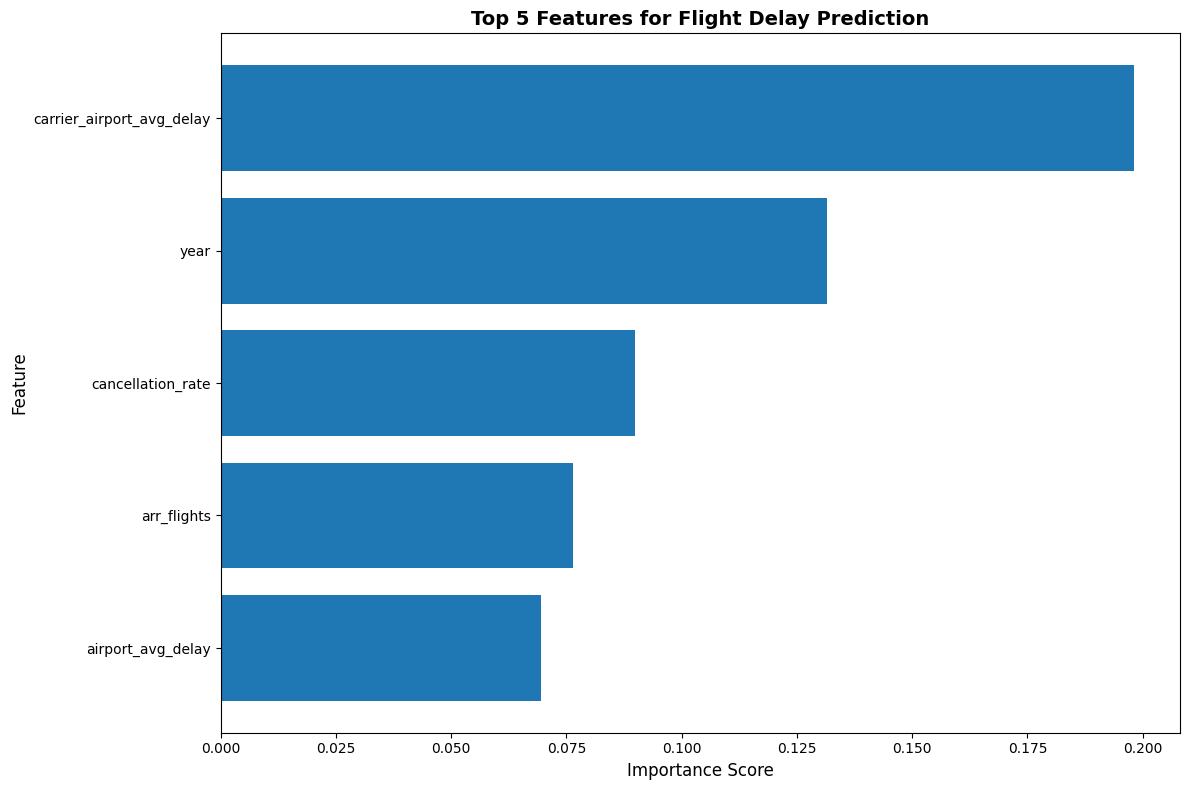

In [35]:
# Get feature importance from best model
feature_importance = pd.DataFrame({
    'Feature': all_features,
    'Importance': best_rf.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 5 Most Important Features:")
print(feature_importance.head(5).to_string(index=False))

# Visualize
plt.figure(figsize=(12, 8))
top_5 = feature_importance.head(5)
plt.barh(range(len(top_5)), top_5['Importance'])
plt.yticks(range(len(top_5)), top_5['Feature'])
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Top 5 Features for Flight Delay Prediction', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


Summary: 
        
        - Carrier and airport past delay rates is the dominate factor for flight delay prediction. 
        - It is in travelers' interest to check historial delay rates for their carrier-airport combo and put it into consideration. 
        - Airlines should focus on attempting improvement efforts on high-risk routes. It is also a good suggestion to monitor volume indicators as early warning signals. 

**Part 11: Evaluations on the best model (i.e. Random Forest with tuning)**

In [36]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Get predictions from best model (Random Forest with tuning)
y_pred_best = best_rf.predict(X_test)
y_pred_proba_best = best_rf.predict_proba(X_test)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best, target_names=['On-Time', 'Delayed']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
print(f"True Negatives (Correctly predicted On-Time):  {cm[0,0]:,}")
print(f"False Positives (Predicted Delayed, was On-Time): {cm[0,1]:,}")
print(f"False Negatives (Predicted On-Time, was Delayed): {cm[1,0]:,}")
print(f"True Positives (Correctly predicted Delayed):  {cm[1,1]:,}")
print()

# Error rates
fpr = cm[0,1] / (cm[0,0] + cm[0,1])
fnr = cm[1,0] / (cm[1,0] + cm[1,1])
print(f"False Positive Rate: {fpr*100:.2f}%")
print(f"False Negative Rate: {fnr*100:.2f}%")



Classification Report:
              precision    recall  f1-score   support

     On-Time       0.80      0.87      0.83     21325
     Delayed       0.75      0.64      0.69     13009

    accuracy                           0.78     34334
   macro avg       0.78      0.76      0.76     34334
weighted avg       0.78      0.78      0.78     34334

True Negatives (Correctly predicted On-Time):  18,563
False Positives (Predicted Delayed, was On-Time): 2,762
False Negatives (Predicted On-Time, was Delayed): 4,624
True Positives (Correctly predicted Delayed):  8,385

False Positive Rate: 12.95%
False Negative Rate: 35.54%
